# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：使用 PyTorch 实现线性回归

## 挑战介绍

上一个实验中，我们对 PyTorch 的使用进行了介绍，相信你已经对 PyTorch 的张量类型及常用的运算方法比较熟悉了。实验中，我们还尝试使用 PyTorch 来构建了一个简单的 BP 神经网络结构。本次挑战中，需要你使用 PyTorch 实现再熟悉不过的线性回归。当然，挑战的目的在于继续熟悉对 PyTorch 的使用。 

## 挑战知识点

- PyTorch 原理及使用
- 线性回归

---

## 挑战内容

线性回归已经是我们的老朋友了，在第一周的课程中就已经对其进行了深入的介绍。如果用一句话来概括线性回归，那就是在输入和输出数据之间通过线性方法进行建模。

首先，我们生成本次挑战所需要的示例数据。

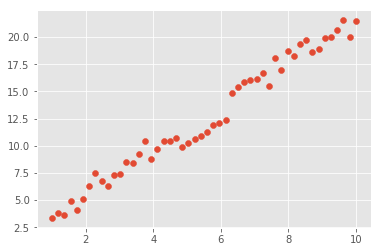

In [1]:
import torch as t
from matplotlib import pyplot as plt
%matplotlib inline

t.manual_seed(10)
x = t.linspace(1, 10, 50)
y = 2 * x + 3 * t.rand(50)

plt.style.use("ggplot") # 使用美观的样式
plt.scatter(x, y)

### 实现线性回归模型

前面的实验内容中，我们说过 `torch.nn.Module` 类是所有神经网络的基类，它既可以表示神经网络中的某层，也可以表示若干层的神经网络。接下来，你将通过继承 `torch.nn.Modules` 类来实现我们所需要的 `LinearRegressionModel()` 类。

---

**<font color='red'>挑战</font>：继承 `torch.nn.Module` 类实现挑战所需的 `LinearRegressionModel()` 线性回归类。**

**<font color='blue'>规定</font>**：只能使用 torch 模块提供的类和方法。

**<font color='green'>提示</font>**：可能会用到 `nn.Linear()` 线性变换层。[官方文档](https://pytorch.org/docs/master/nn.html#linear-layers)

In [2]:
import torch.nn as nn

### 代码开始 ### (≈ 3 行代码)
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super(LinearRegressionModel, self).__init__() 
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        out = self.linear(x)
        return out
### 代码结束 ###

In [3]:
# 解法 2 
### 代码开始 ### (≈ 3 行代码)
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        nn.Module.__init__(self)
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        out = self.linear(x)
        return out
### 代码结束 ###

**运行测试：**

In [4]:
LinearRegressionModel()

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

**期望输出：**

<center>`LinearRegressionModel(
    (linear): Linear(in_features=1, out_features=1, bias=True))`</center>

本次挑战当然不会使用最小二乘法来求解线性回归参数，我们将使用随机梯度下降算法求解。所以，首先需要定义损失函数以及优化器。挑战将会选择 MSE 的值作为损失函数，并通过 SGD 算法求解。

---

**<font color='red'>挑战</font>：定义 MSE 损失函数及随机梯度下降优化器。**

**<font color='blue'>规定</font>**：随机梯度下降优化器的学习率设为 `0.01`，其余使用默认参数。

**<font color='green'>提示</font>**：可能会用到实验中提到的损失函数和优化器。

In [5]:
model = LinearRegressionModel() # 实例化模型
### 代码开始 ### (≈ 2 行代码)

loss_fn = nn.MSELoss() # 定义损失函数
optimiser = t.optim.SGD(model.parameters(), lr = 0.01) # 定义优化器

### 代码开始 ### (≈ 3 行代码)

**运行测试：**

In [6]:
loss_fn, optimiser

(MSELoss(), SGD (
 Parameter Group 0
     dampening: 0
     lr: 0.01
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

**期望输出：**

<center>`(MSELoss(), SGD (
 Parameter Group 0
     dampening: 0
     lr: 0.01
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))`</center>

一切准备就绪，接下来就是训练模型并求解线性回归参数。

---

**<font color='red'>挑战</font>：完成线性回归参数优化迭代过程。**

**<font color='blue'>规定</font>**：迭代次数为 100 次。

**<font color='green'>提示</font>**：注意输入数据的形状问题。思路是先前向传递得到真实值，计算损失并通过优化器迭代。

In [7]:
### 代码开始 ### (≈ 7 行代码)
for epoch in range(100):
    X = x.reshape(len(x), 1) # 输入 x 张量
    Y = y.reshape(len(y), 1) # 输入 y 张量
    
    optimiser.zero_grad()
    Y_ = model.forward(X)
    loss = loss_fn(Y_, Y)
    loss.backward()
    optimiser.step()
    ### 代码结束 ###
    
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 314.94317626953125
epoch 10, loss 0.7903921604156494
epoch 20, loss 0.7836881875991821
epoch 30, loss 0.7774626016616821
epoch 40, loss 0.7716800570487976
epoch 50, loss 0.7663095593452454
epoch 60, loss 0.7613217234611511
epoch 70, loss 0.7566891312599182
epoch 80, loss 0.7523863911628723
epoch 90, loss 0.748390793800354


**参考输出：**（loss 数值不同没有关系）

    epoch 0, loss 314.94317626953125
    epoch 10, loss 0.7903921604156494
    epoch 20, loss 0.7836881875991821
    epoch 30, loss 0.7774626016616821
    epoch 40, loss 0.7716800570487976
    epoch 50, loss 0.7663095593452454
    epoch 60, loss 0.7613217234611511
    epoch 70, loss 0.7566891312599182
    epoch 80, loss 0.7523863911628723
    epoch 90, loss 0.748390793800354

---

最后，同样需要将拟合后直线绘制到原散点图中查看效果。

**<font color='red'>挑战</font>：根据拟合参数，将拟合直线绘制到图像中。**

**<font color='green'>提示</font>**：通过 `model.state_dict()` 读取拟合参数。

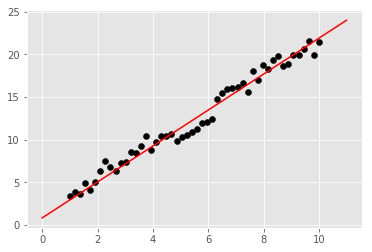

In [8]:
### 代码开始 ### (≈ 4 行代码)
weight = model.state_dict()['linear.weight'] # 权重
bias = model.state_dict()['linear.bias'] # 偏置项

plt.style.use("ggplot")
plt.scatter(x, y,c='black')
plt.plot([0, 11],[bias, weight * 11 + bias], 'r')
### 代码结束 ###

**期望输出：**

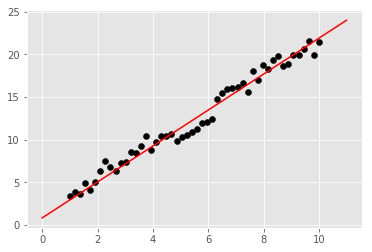

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>